<a href="https://colab.research.google.com/github/LindsClar/Capstone-3/blob/main/Data_Wrangling_2_Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Coffee Sales

Coffee is my favorite drug, and as a mom, it's the drug I drink daily. I especially love my coffee when someone else makes it. Through these Coffee sales I will be cleaning and organizing the data to assist my favorite businesses.

Data: https://www.kaggle.com/code/ahmedabbas757/coffee-shop-sales/input

Table of contents
  - Import libraries
  - Import Data
  - Analyze data
  - Shaping the Data
    - Renaming and removing unneccessary data




In [43]:
#import all my libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import plotly.express as px
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

import plotly.express as px
import plotly.graph_objects as go
import itertools

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings('ignore')

Reading in the Data

In [44]:
#importing data
df = pd.read_excel('/content/Coffee Shop Sales.xlsx')

Analyzing the DF.

In [45]:
df.head(20)

transaction_id transaction_date transaction_time  transaction_qty  \
0                1       2023-01-01         07:06:11                2   
1                2       2023-01-01         07:08:56                2   
2                3       2023-01-01         07:14:04                2   
3                4       2023-01-01         07:20:24                1   
4                5       2023-01-01         07:22:41                2   
5                6       2023-01-01         07:22:41                1   
6                7       2023-01-01         07:25:49                1   
7                8       2023-01-01         07:33:34                2   
8                9       2023-01-01         07:39:13                1   
9               10       2023-01-01         07:39:34                2   
10              11       2023-01-01         07:43:05                1   
11              12       2023-01-01         07:44:35                2   
12              13       2023-01-01         07:45:51                1   
13              14       2023-01-01         07:48:19                1   
14              15       2023-01-01         07:52:36                2   
15              16       2023-01-01         07:59:58                2   
16              17       2023-01-01         07:59:58                1   
17              18       2023-01-01         08:00:18                1   
18              19       2023-01-01         08:00:39                2   
19              20       2023-01-01         08:11:45                1   

    store_id   store_location  product_id  unit_price    product_category  \
0          5  Lower Manhattan          32        3.00              Coffee   
1          5  Lower Manhattan          57        3.10                 Tea   
2          5  Lower Manhattan          59        4.50  Drinking Chocolate   
3          5  Lower Manhattan          22        2.00              Coffee   
4          5  Lower Manhattan          57        3.10                 Tea   
5          5  Lower Manhattan          77        3.00              Bakery   
6          5  Lower Manhattan          22        2.00              Coffee   
7          5  Lower Manhattan          28        2.00              Coffee   
8          5  Lower Manhattan          39        4.25              Coffee   
9          5  Lower Manhattan          58        3.50  Drinking Chocolate   
10         5  Lower Manhattan          56        2.55                 Tea   
11         5  Lower Manhattan          33        3.50              Coffee   
12         5  Lower Manhattan          51        3.00                 Tea   
13         5  Lower Manhattan          57        3.10                 Tea   
14         5  Lower Manhattan          87        3.00              Coffee   
15         5  Lower Manhattan          47        3.00                 Tea   
16         5  Lower Manhattan          79        3.75              Bakery   
17         8   Hell's Kitchen          42        2.50                 Tea   
18         8   Hell's Kitchen          59        4.50  Drinking Chocolate   
19         8   Hell's Kitchen          61        4.75  Drinking Chocolate   

             product_type                product_detail  
0   Gourmet brewed coffee                   Ethiopia Rg  
1         Brewed Chai tea      Spicy Eye Opener Chai Lg  
2           Hot chocolate             Dark chocolate Lg  
3             Drip coffee   Our Old Time Diner Blend Sm  
4         Brewed Chai tea      Spicy Eye Opener Chai Lg  
5                   Scone                 Oatmeal Scone  
6             Drip coffee   Our Old Time Diner Blend Sm  
7   Gourmet brewed coffee     Columbian Medium Roast Sm  
8        Barista Espresso                      Latte Rg  
9           Hot chocolate             Dark chocolate Rg  
10        Brewed Chai tea      Spicy Eye Opener Chai Rg  
11  Gourmet brewed coffee                   Ethiopia Lg  
12       Brewed Black tea                  Earl Grey Lg  
13        Brewed Chai tea      Spicy Eye

Now that the Data a loaded, it's time to analyze the data to determine how we'll approach it. I see above that there a lot of columns that aren't necceary so I will be dropping them down below. This will streamline the data necceary.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [47]:
df.shape

(149116, 11)

In [48]:
df.isnull()

transaction_id  transaction_date  transaction_time  transaction_qty  \
0                False             False             False            False   
1                False             False             False            False   
2                False             False             False            False   
3                False             False             False            False   
4                False             False             False            False   
...                ...               ...               ...              ...   
149111           False             False             False            False   
149112           False             False             False            False   
149113           False             False             False            False   
149114           False             False             False            False   
149115           False             False             False            False   

        store_id  store_location  product_id  unit_price  product_category  \
0          False           False       False       False             False   
1          False           False       False       False             False   
2          False           False       False       False             False   
3          False           False       False       False             False   
4          False           False       False       False             False   
...          ...             ...         ...         ...               ...   
149111     False           False       False       False             False   
149112     False           False       False       False             False   
149113     False           False       False       False             False   
149114     False           False       False       False             False   
149115     False           False       False       False             False   

        product_type  product_detail  
0              False           False  
1              False           False  
2              False           False  
3              False           False  
4              False           False  
...              ...             ...  
149111         False           False  
149112         False           False  
149113         False           False  
149114         False           False  
149115         False           False  

[149116 rows x 11 columns]

# Transforming the Data
Looking through the data, there are a few changes I plan to make to better organize how the DataFrame is presented.

Based on how the data is currently structured, I’ve decided to take a different approach instead of melting or pivoting the data. I will narrow down the data first and then expand the columns that track the time periods and restaurants.

I’ll start by creating a column to track the time periods. Then, I will expand the store information to include separate columns for each restaurant. The goal is to clean the data thoroughly and reshape it so that it aligns with key metrics like the time of day (period), day of the week, and specific dates, making it easier to analyze.

In [49]:
df.rename(columns={'unit_price': 'Price','transaction_qty': 'Qty','transaction_date': 'Date', 'transaction_time': 'Time', 'store_location': 'Store','product_category': 'Product'}, inplace=True)

In [50]:
df.head()

transaction_id       Date      Time  Qty  store_id            Store  \
0               1 2023-01-01  07:06:11    2         5  Lower Manhattan   
1               2 2023-01-01  07:08:56    2         5  Lower Manhattan   
2               3 2023-01-01  07:14:04    2         5  Lower Manhattan   
3               4 2023-01-01  07:20:24    1         5  Lower Manhattan   
4               5 2023-01-01  07:22:41    2         5  Lower Manhattan   

   product_id  Price             Product           product_type  \
0          32    3.0              Coffee  Gourmet brewed coffee   
1          57    3.1                 Tea        Brewed Chai tea   
2          59    4.5  Drinking Chocolate          Hot chocolate   
3          22    2.0              Coffee            Drip coffee   
4          57    3.1                 Tea        Brewed Chai tea   

                product_detail  
0                  Ethiopia Rg  
1     Spicy Eye Opener Chai Lg  
2            Dark chocolate Lg  
3  Our Old Time Diner Blend Sm  
4     Spicy Eye Opener Chai Lg

In [51]:
#Product category and Product type are extremely similar
df = df.drop(columns=['product_type', 'transaction_id','store_id', 'product_id', 'product_detail'])
df.head(20)

Date      Time  Qty            Store  Price             Product
0  2023-01-01  07:06:11    2  Lower Manhattan   3.00              Coffee
1  2023-01-01  07:08:56    2  Lower Manhattan   3.10                 Tea
2  2023-01-01  07:14:04    2  Lower Manhattan   4.50  Drinking Chocolate
3  2023-01-01  07:20:24    1  Lower Manhattan   2.00              Coffee
4  2023-01-01  07:22:41    2  Lower Manhattan   3.10                 Tea
5  2023-01-01  07:22:41    1  Lower Manhattan   3.00              Bakery
6  2023-01-01  07:25:49    1  Lower Manhattan   2.00              Coffee
7  2023-01-01  07:33:34    2  Lower Manhattan   2.00              Coffee
8  2023-01-01  07:39:13    1  Lower Manhattan   4.25              Coffee
9  2023-01-01  07:39:34    2  Lower Manhattan   3.50  Drinking Chocolate
10 2023-01-01  07:43:05    1  Lower Manhattan   2.55                 Tea
11 2023-01-01  07:44:35    2  Lower Manhattan   3.50              Coffee
12 2023-01-01  07:45:51    1  Lower Manhattan   3.00                 Tea
13 2023-01-01  07:48:19    1  Lower Manhattan   3.10                 Tea
14 2023-01-01  07:52:36    2  Lower Manhattan   3.00              Coffee
15 2023-01-01  07:59:58    2  Lower Manhattan   3.00                 Tea
16 2023-01-01  07:59:58    1  Lower Manhattan   3.75              Bakery
17 2023-01-01  08:00:18    1   Hell's Kitchen   2.50                 Tea
18 2023-01-01  08:00:39    2   Hell's Kitchen   4.50  Drinking Chocolate
19 2023-01-01  08:11:45    1   Hell's Kitchen   4.75  Drinking Chocolate

 I don't like how the table has a lot more NaN, also should I use .melt? I was thinking of seperating

Note: the product category to create three or 4 smaller df by category
  Product Category
    - Coffee
    - Tea
    - Drinking coffee
    - Bakery

  While going throught the code, I went back and decided to classify by resturant and not focusing on coffee. I would like to see the sales of each Item and analyse what sells the most throughout the day

In [52]:
#locate duplicates
duplicates = df.duplicated()
df.loc[duplicates, :]

Date      Time  Qty            Store  Price Product
3256   2023-01-07  07:00:50    1  Lower Manhattan   3.75  Bakery
3438   2023-01-07  09:31:48    1   Hell's Kitchen   3.75  Bakery
3508   2023-01-07  10:29:12    1  Lower Manhattan   3.75  Bakery
3509   2023-01-07  10:29:12    1  Lower Manhattan   3.75  Bakery
3835   2023-01-08  07:30:17    1  Lower Manhattan   4.25  Coffee
...           ...       ...  ...              ...    ...     ...
148471 2023-06-30  09:49:35    1   Hell's Kitchen   3.75  Bakery
148610 2023-06-30  10:34:30    1  Lower Manhattan   3.75  Bakery
148701 2023-06-30  11:18:31    1   Hell's Kitchen   3.25  Bakery
148717 2023-06-30  11:24:35    1   Hell's Kitchen   3.75  Bakery
148718 2023-06-30  11:24:35    1   Hell's Kitchen   3.75  Bakery

[453 rows x 6 columns]

In [53]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
149111    False
149112    False
149113    False
149114    False
149115    False
Length: 149116, dtype: bool


While price point, quantity, and product are all the same, which could indicate a duplicate, we need to consider the time of purchase. It appears that many of these products are purchased at different times, except for a few rows like 148718 and 148717. I will investigate this further as I clean the data and focus on a single store.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     149116 non-null  datetime64[ns]
 1   Time     149116 non-null  object        
 2   Qty      149116 non-null  int64         
 3   Store    149116 non-null  object        
 4   Price    149116 non-null  float64       
 5   Product  149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 6.8+ MB


In [55]:
#checking shape of DF
df.shape

(149116, 6)

Examing Unique values and missing values to drop

In [56]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [57]:
#new column to create a distinct period of time morning, day, night
df['Period'] = pd.cut(
    pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],  # Corrected labels
    right=False  # Use right=False to ensure that 24:00 falls into the last bin
)

In [58]:
#inspect
df.head(5)

Date      Time  Qty            Store  Price             Product  \
0 2023-01-01  07:06:11    2  Lower Manhattan    3.0              Coffee   
1 2023-01-01  07:08:56    2  Lower Manhattan    3.1                 Tea   
2 2023-01-01  07:14:04    2  Lower Manhattan    4.5  Drinking Chocolate   
3 2023-01-01  07:20:24    1  Lower Manhattan    2.0              Coffee   
4 2023-01-01  07:22:41    2  Lower Manhattan    3.1                 Tea   

    Period  
0  Morning  
1  Morning  
2  Morning  
3  Morning  
4  Morning

In [59]:
#ensuring format of time in the df
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [60]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [61]:
df.head(5)

Date      Time  Qty            Store  Price             Product  \
0 2023-01-01  07:06:11    2  Lower Manhattan    3.0              Coffee   
1 2023-01-01  07:08:56    2  Lower Manhattan    3.1                 Tea   
2 2023-01-01  07:14:04    2  Lower Manhattan    4.5  Drinking Chocolate   
3 2023-01-01  07:20:24    1  Lower Manhattan    2.0              Coffee   
4 2023-01-01  07:22:41    2  Lower Manhattan    3.1                 Tea   

    Period  
0  Morning  
1  Morning  
2  Morning  
3  Morning  
4  Morning

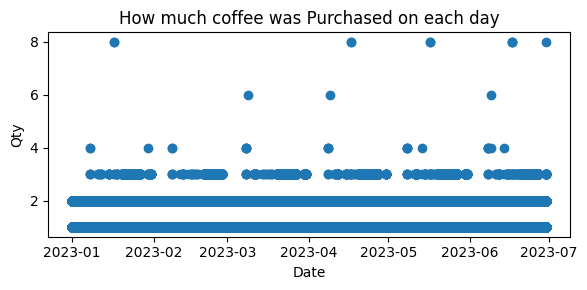

In [62]:
#now I can plot the date to product purchase
plt.figure(figsize=(6,3))
plt.scatter(df['Date'], df['Qty'])
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('How much coffee was Purchased on each day')
plt.tight_layout()
plt.show()

In [63]:
fig = px.line(df, x='Date', y='Qty', title='How much Product is normally was Purchased Over 7 Months')
fig.show()

With the plotting above I can see how purchase across the time line of 7 months is. We can also see how many coffee's customers purchase. I believe that there is different overlay between each resturant so I will be eliminating two of the three resturants so that we can inspect the variable of the items in one resturants.

In [64]:
df = df[df['Store']=="Astoria"]

In [65]:
df.head()
df.shape

(50599, 7)

Checking duplicates again in the df.



In [84]:
duplicates_df = df.duplicated()
duplicates_df

105       False
106       False
107       False
111       False
113       False
          ...  
149103    False
149104    False
149105    False
149107    False
149108    False
Length: 50599, dtype: bool

Looks like there's no duplicates that are duplicates of each transaction.

In [67]:
#the new column day_type
df['day_type'] = df['Date'].dt.day_name()

In [68]:
#filling the column with the type of week ie. weekend and weekday
df['day_type'] = df['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [69]:
#inspecting
df.head(5)

Date      Time  Qty    Store  Price             Product   Period  \
105 2023-01-01  11:01:48    1  Astoria   2.00              Coffee  Morning   
106 2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107 2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111 2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113 2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   

    day_type  
105  Weekend  
106  Weekend  
107  Weekend  
111  Weekend  
113  Weekend

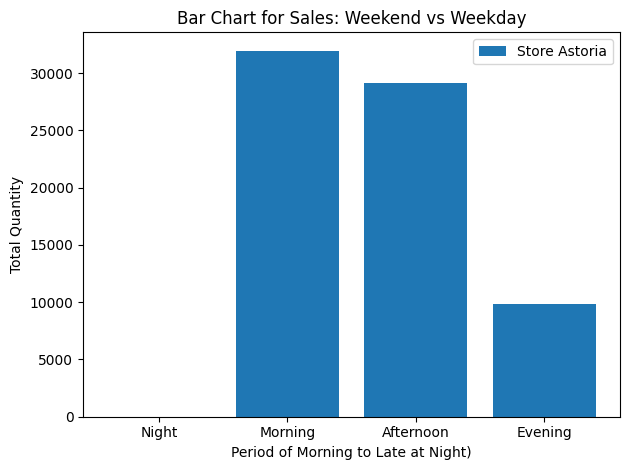

In [70]:
fig, ax = plt.subplots()

#"Period" * "Store" = "Qty"
grouped = df.groupby(["Period", "Store"])["Qty"].sum().reset_index()

#creating bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["Period"], store_data["Qty"], label=f"Store {store}")

#labelling
ax.set_xlabel("Period of Morning to Late at Night)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

#plot
plt.tight_layout()
plt.show()

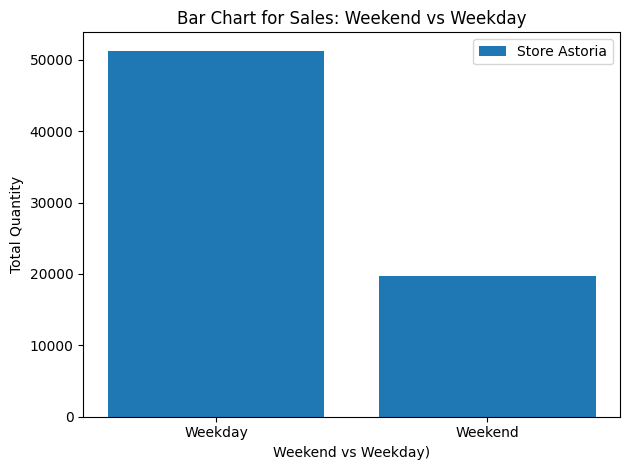

In [71]:
fig, ax = plt.subplots()

# Grouping by "Period" and "Store" to calculate total quantity
grouped = df.groupby(["day_type", "Store"])["Qty"].sum().reset_index()

# Creating the bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["day_type"], store_data["Qty"], label=f"Store {store}")

# Labelling
ax.set_xlabel("Weekend vs Weekday)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

With the bar chart above we can see the difference in sales in Astoria on the weekdays vs the weekends

In [72]:
#seperating the columns for store
columns = pd.get_dummies(df['Store'], prefix='')

In [73]:
df = pd.concat([df, columns], axis=1)

In [74]:
fig = px.scatter(df, x='Date', y='Period', color='Product', hover_data={'Date': '|%B %d, %Y'}, title='Products in Astoria'
)

fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")

fig.show()


In [75]:
df.head(5)

Date      Time  Qty    Store  Price             Product   Period  \
105 2023-01-01  11:01:48    1  Astoria   2.00              Coffee  Morning   
106 2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107 2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111 2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113 2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   

    day_type  _Astoria  
105  Weekend      True  
106  Weekend      True  
107  Weekend      True  
111  Weekend      True  
113  Weekend      True

While looking through all my Data, I realized that I truly need to analyze each location for the sales. I see through this Data that I need to analyze each location to truly understand the sales per location.

In [76]:
df['datetime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str))

In [77]:
specific_date = '2023-01-01'
plot_data = df[df['Date'] == specific_date]

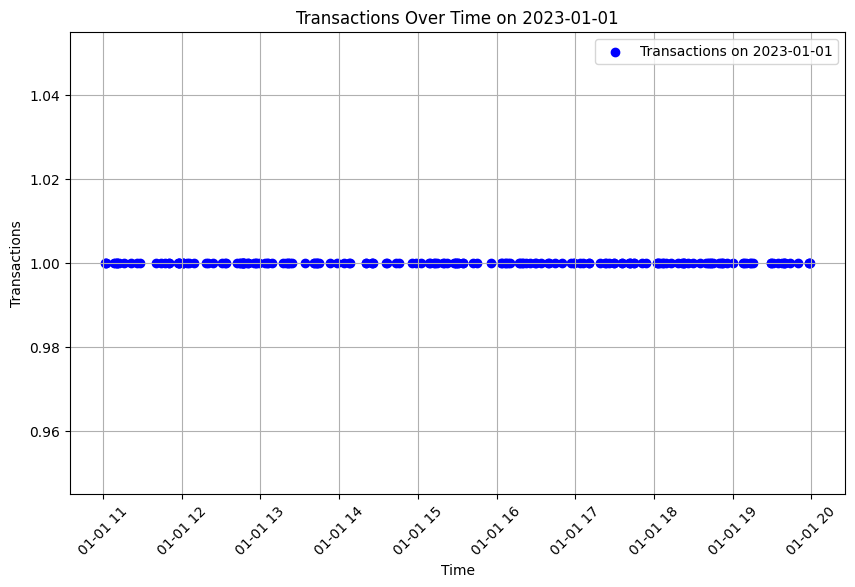

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['datetime'], plot_data['_Astoria'], color='blue', label=f'Transactions on {specific_date}')
plt.title(f'Transactions Over Time on {specific_date}')
plt.xlabel('Time')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#Overview

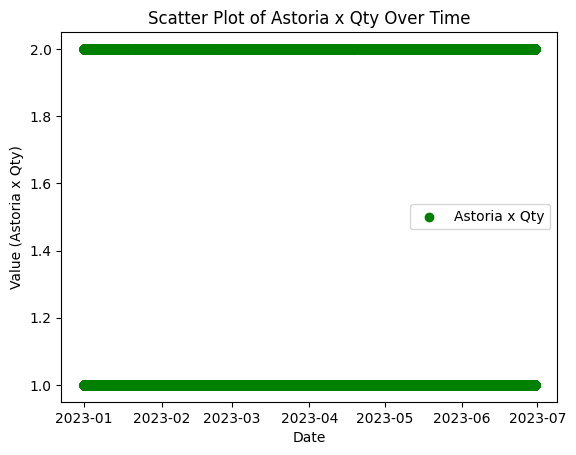

In [80]:
#scatter plot
fig, ax = plt.subplots()
ax.scatter(df["Date"], df["_Astoria"] * df["Qty"], c="green", label="Astoria x Qty")

#labelling
ax.set_xlabel("Date")
ax.set_ylabel("Value (Astoria x Qty)")
ax.set_title("Scatter Plot of Astoria x Qty Over Time")
ax.legend()

#show
plt.show()

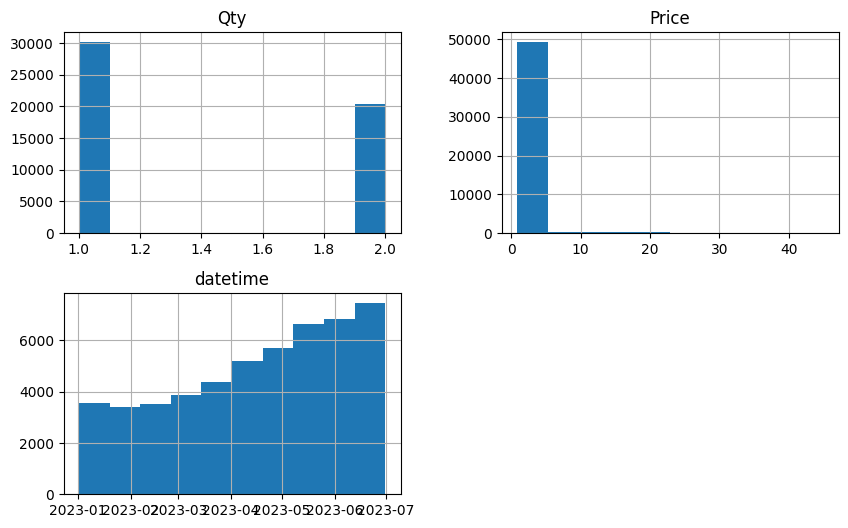

In [85]:
df_hist = df.drop(columns=['Date'],axis=1)
df_hist.hist(figsize=(10,6));

In [86]:
duplicate_dates = df[df['Date'].duplicated()]
print(duplicate_dates)

             Date      Time  Qty    Store  Price             Product   Period  \
106    2023-01-01  11:01:58    1  Astoria   3.75              Coffee  Morning   
107    2023-01-01  11:01:58    1  Astoria   3.50              Bakery  Morning   
111    2023-01-01  11:08:11    1  Astoria   4.50  Drinking Chocolate  Morning   
113    2023-01-01  11:09:01    1  Astoria   4.50  Drinking Chocolate  Morning   
114    2023-01-01  11:10:21    1  Astoria   3.00                 Tea  Morning   
...           ...       ...  ...      ...    ...                 ...      ...   
149103 2023-06-30  19:51:59    2  Astoria   3.00              Coffee  Evening   
149104 2023-06-30  19:52:28    2  Astoria   2.45              Coffee  Evening   
149105 2023-06-30  19:53:46    1  Astoria   3.00              Coffee  Evening   
149107 2023-06-30  19:57:49    2  Astoria   2.50                 Tea  Evening   
149108 2023-06-30  19:57:49    1  Astoria   3.25              Bakery  Evening   

       day_type  _Astoria  

In [87]:
print(df.dtypes)

Date        datetime64[ns]
Time                object
Qty                  int64
Store               object
Price              float64
Product             object
Period            category
day_type            object
_Astoria              bool
datetime    datetime64[ns]
dtype: object


In [88]:
df['profits'] = df['Price'] * df['Qty']

# Viewing What Outliers the DF has.

In [103]:
Q1 = df['profits'].quantile(0.25)
Q3 = df['profits'].quantile(0.75)
IQR = Q3 - Q1

In [104]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [109]:
outliers = df[(df['profits'] < lower_bound) | (df['profits'] > upper_bound)]
print("Outliers:\n", outliers)

print("Number of outliers:", len(outliers))

print("Sum of outliers:" , outliers['profits'].sum())

print("Sum of profits", df['profits'].sum())

Outliers:
              Date      Time  Qty    Store  Price       Product     Period  \
4067   2023-01-08  10:44:10    1  Astoria  14.75  Coffee beans    Morning   
4199   2023-01-08  14:02:53    1  Astoria  10.95     Loose Tea  Afternoon   
4299   2023-01-08  17:48:46    1  Astoria  18.00  Coffee beans  Afternoon   
4359   2023-01-08  19:54:56    1  Astoria  14.00       Branded    Evening   
4462   2023-01-09  07:59:55    1  Astoria  21.00  Coffee beans    Morning   
...           ...       ...  ...      ...    ...           ...        ...   
148248 2023-06-30  08:23:59    1  Astoria  14.00       Branded    Morning   
148659 2023-06-30  10:53:26    1  Astoria  10.95     Loose Tea    Morning   
148680 2023-06-30  10:58:22    1  Astoria  14.00       Branded    Morning   
148927 2023-06-30  15:59:13    1  Astoria  19.75  Coffee beans  Afternoon   
149064 2023-06-30  18:49:29    1  Astoria  14.75  Coffee beans    Evening   

       day_type  _Astoria            datetime  profits  
4067   

In [93]:
fig = px.pie(outliers, values='profits', names='Product', title='Purchase Outliers', color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()

This is a really interesting demonstration of product sales and the transactions that produced the outliers. The products that likely remain in stock at Astoria without requiring significant effort from employees tend to represent the highest and lowest purchase amounts, which are identified as outliers. These dried products, such as coffee beans and loose tea, have a long shelf life, so they don’t significantly impact the workload of employees unless they are made in-house.

Revenue analysis shows that the outliers account for $16,307.86 over a 7-month period, compared to the total profits of $232,243.91. I’d like to narrow the impact of these outliers by removing those values to improve future forecasting and provide greater consistency in the dataset.



In [110]:
df = df.drop(outliers.index)

In [114]:
df.shape

(49774, 11)

With this we went from 149116 to 49,774 transactions

Now that I've wrangled and shaped the data to my liking, I can begin the EDA process in the next phase of the capstone project. During the EDA process, I will explore the differences in sales based on the time of day and location. Specifically, I will analyze sales trends for different times of the day to identify patterns and variations. Furthermore, I will delve deeper into forecasting future sales and exploring potential improvements through modeling.

Now we go into EDA...